In [1]:
%matplotlib inline  
import numpy as np
from lmfit import Parameters
import matplotlib.pyplot as plt

import sys
sys.path.append('../src')
from xfmr import loadXFMRDelayScans, fitXFMR

plt.rcParams.update({'font.size': 14, 'xtick.top': True, 'ytick.right': True, 'xtick.direction': 'in', 'ytick.direction': 'in'})

In [2]:
directory="./example_data/xfmr_data"

In [23]:
""" load the data """

scanIDs = range(585516, 585559)
data = loadXFMRDelayScans(directory, scanIDs)

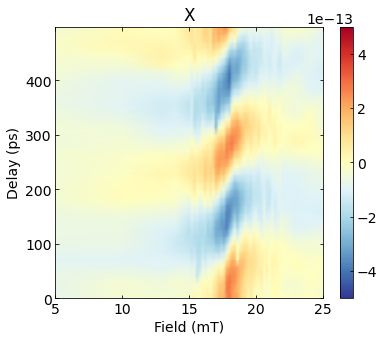

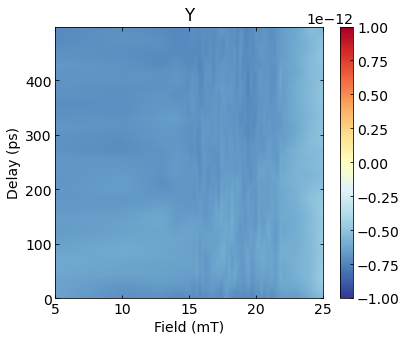

In [24]:
# colormap plot 

fig, ax = plt.subplots(1, 1, figsize=(6, 5), facecolor='w')
plt.pcolormesh(data['field'], data['delay'], data['x'].T, cmap='RdYlBu_r', shading='gouraud', vmin=-5e-13, vmax=5e-13)
plt.colorbar()
plt.title("X")
plt.xlabel("Field (mT)")
plt.ylabel("Delay (ps)")
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(6, 5), facecolor='w')
plt.pcolormesh(data['field'], data['delay'], data['y'].T, cmap='RdYlBu_r',shading='gouraud', vmin=-1e-12, vmax=1e-12)
plt.title("Y")
plt.colorbar()
plt.xlabel("Field (mT)")
plt.ylabel("Delay (ps)")
plt.show()


In [5]:
""" Fit the data  """

p=Parameters()
p.add('amp', vary=True, value=1e-13, min=1e-15, max=4e-13)
p.add('phase', vary=True, value=130.0, min=-100.0, max=150.0)
p.add('freq', vary=False, value=4)
p.add('offset', vary=True, value=0.0)

fitXFMR(data, p, showPlots=False)

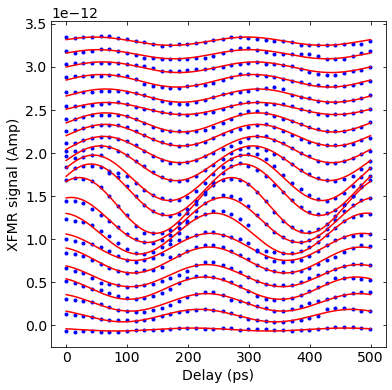

In [20]:
# Waterfall plot

def sin(x, amp, phase, freq, offset):
    return amp*np.sin(phase*np.pi/180.0 + x/1000.0*freq*2*np.pi) + offset

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

shift = 8e-14
for i in range(len(data['field']))[::2]:
    plt.plot(data['delay'], data['x'][i,:] + i*shift, 'b.')
    x = np.linspace(0,500,1000)
    plt.plot(x, sin(x,data['amp'][i], data['phase'][i], data['freq'][i], data['offset'][i]) + i*shift, 'r-')

plt.xlabel("Delay (ps)")
plt.ylabel("XFMR signal (Amp)")
plt.show()

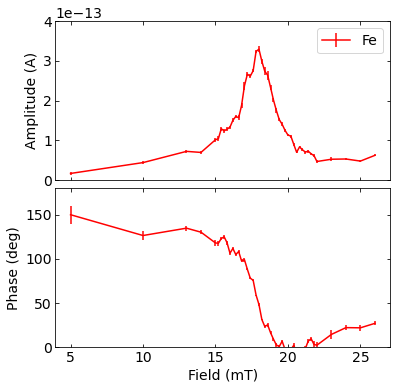

In [15]:
""" plot the fit """

fig, ax = plt.subplots(2, 1, figsize=(6, 6), facecolor='w', sharex=True)

grp = data
ax[0].errorbar(grp['field'], grp['amp'], yerr=grp['amp_stderr'], fmt='r', label="Fe")
ax[1].errorbar(grp['field'], grp['phase'], yerr=grp['phase_stderr'], fmt='r')

ax[0].legend()
ax[1].set_xlabel("Field (mT)")
ax[0].set_ylabel("Amplitude (A)")
ax[1].set_ylabel("Phase (deg)")

plt.subplots_adjust( hspace=0.05, wspace=0.05)
ax[0].set_ylim(0, 4e-13)
ax[1].set_ylim(0, 180)
plt.show()